In [91]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import json
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [92]:
def create_df(csv_file):
    return pd.read_csv(csv_file)

def create_tech_list(data):
    lists = []
    master = []
    counter = -1
    for i  in data['tech']:
        counter += 1
       
        try:
            lists.append(eval(i))
        except:

            continue

    for l in lists:
        for tech in l:
            master.append(tech)
            
    techs = {}
    for tech in master:
        if tech not in techs: 
            techs[tech] = 1
        else:
            techs[tech] += 1

    good_techs = {}
    good_keys = []
    for key in techs:
        if techs[key] > 50: #change as the data grows
            good_techs[key] = techs[key]
            good_keys.append(key)
    return good_techs

def tech_visualization(good_techs):
    plt.bar(range(len(good_techs)), list(good_techs.values()), align='center')
    plt.xticks(range(len(good_techs)), list(good_techs.keys()), rotation = 90)

def generate_feature_labels(good_techs):
    good_keys = []
    for key in good_techs:
        good_keys.append(key)
    good_keys.append('num_technologies')
    good_keys.append('photo_url')
    good_keys.append('num_collaborators')
    good_keys.append('length')
    good_keys.append('is_winner')
    return good_keys

def transform_df(df, good_keys):
    reduction = 5
    counter = -1
    rows = []
    for tech_list in df['tech']:
        row = []
        counter += 1
        num_technologies = 0
        try:
            tech_list = eval(tech_list)      #pop technologies
            num_technologies = len(tech_list)
            for i,key in enumerate(good_keys):
                if i == len(good_keys) - reduction:
                    break
                if key in tech_list:
                    row.append(1)
                else:
                    row.append(0)

        except:
            for i in range(len(good_keys) - reduction):
                row.append(0)

        row.append(num_technologies)

        if type(df['photo_url'][counter]) == str: #photo
            row.append(1)
        else:
            row.append(0)

        try:
            row.append(len(eval(df['members'][counter])))
        except:
            print("")
            continue

        try:
            l = eval(df['responses'][counter])  #length
            row.append(l[0])
        except:
            print("ERROR WITH RESPONSE DATA")
            continue

        if str(df['is_winner'][counter]) == 'False':    #pop winner or not
            row.append(0)
        else:
            row.append(1)
        rows.append(row)

    return(pd.DataFrame(rows, columns = good_keys))
    
def predict(test, train, good_keys):
    inputs = []
    for i,key in enumerate(good_keys):
        if i == len(good_keys)-1:
            break
        inputs.append(key)
    target = 'is_winner'
    k = 45
    model = neighbors.KNeighborsClassifier(k)
    model.fit(train[inputs], train[target].ravel())
    predicted = model.predict(test[inputs])
    return(predicted)

def model_stats(test, train, good_keys,df):
    inputs = []
    for i,key in enumerate(good_keys):
        if i == len(good_keys)-1:
            break
        inputs.append(key)
    target = 'is_winner'
    k = 45
    model = neighbors.KNeighborsClassifier(k) 
    model.fit(train[inputs], train[target].ravel())
    predicted = model.predict(test[inputs])
    print("score: ", model.score(test[inputs], test[target]))
    
    scorerVar = make_scorer(f1_score, pos_label=1)
    scores = cross_val_score(model, df[inputs], df[target],cv = 5)
    print("Mean: ", scores.mean())
    print(confusion_matrix(test[target], predicted))
    print(classification_report(test[target], predicted))

    

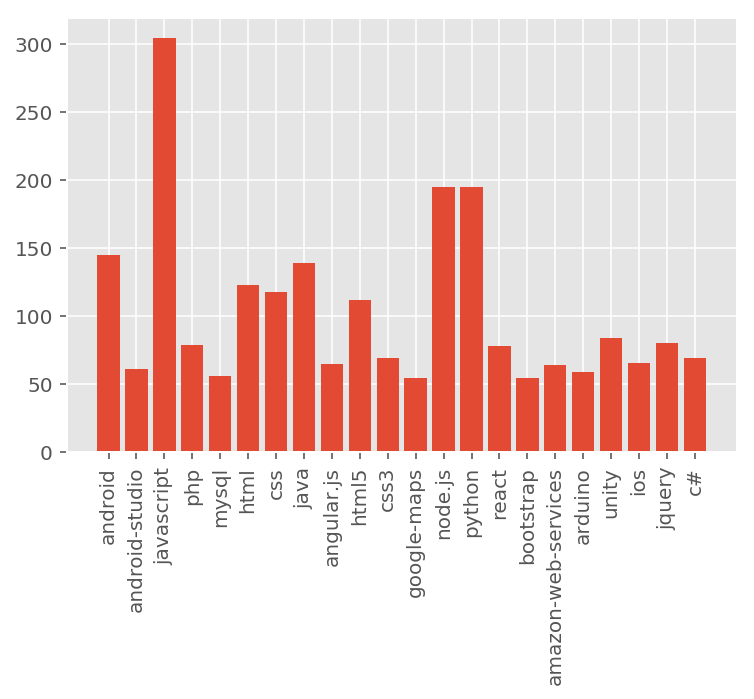

In [93]:
df = create_df("../data/data.csv")
good_techs = create_tech_list(df)
tech_visualization(good_techs)


In [94]:
good_keys = generate_feature_labels(good_techs)
new_df = transform_df(df, good_keys)

In [95]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_df)
predicted = predict(test,train,good_keys)
model_stats(test,train,good_keys,new_df)

score:  0.6162790697674418
Mean:  0.6130106467801697
[[159   2]
 [ 97   0]]
             precision    recall  f1-score   support

          0       0.62      0.99      0.76       161
          1       0.00      0.00      0.00        97

avg / total       0.39      0.62      0.48       258








predicted [0]


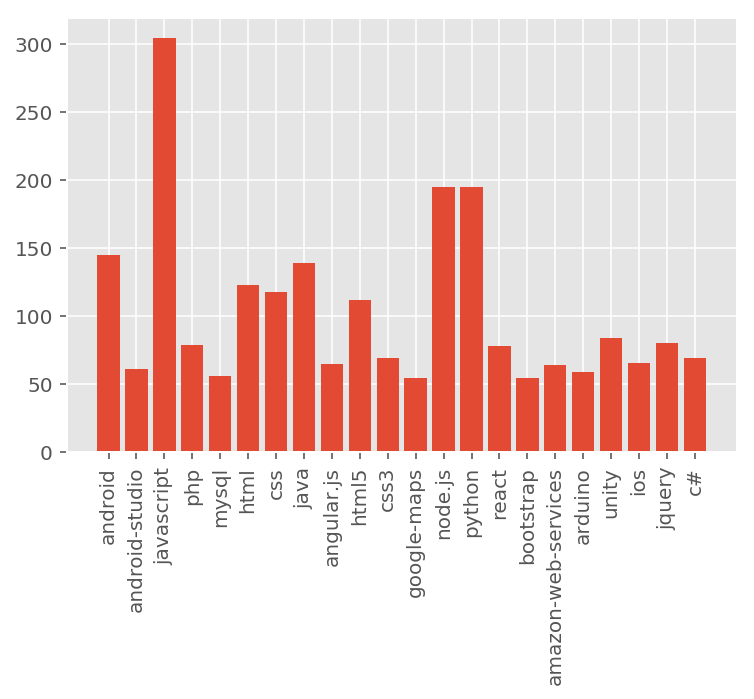

In [97]:
train_df = create_df("../data/data.csv")
test_df = create_df("sampletest.csv")
good_techs = create_tech_list(train_df)
tech_visualization(good_techs)
good_keys = generate_feature_labels(good_techs)
new_df_train = transform_df(train_df, good_keys)
new_df_test = transform_df(test_df, good_keys)
predicted = predict(new_df_test,new_df_train,good_keys)
print("predicted", predicted)